https://www.datacamp.com/tutorial/decision-tree-classification-python

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The time complexity of decision trees is a function of the number of records and attributes in the given data.

The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. But is sensitive to noisy data. It can overfit noisy data. So, Decision trees are biased with imbalance dataset,  it is recommended that balance out the dataset before creating the decision tree.


It does not work well with categorical data:
https://stackoverflow.com/questions/47873366/can-sklearn-decisiontreeclassifier-truly-work-with-categorical-data

scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support categorical variables for now (https://scikit-learn.org/stable/modules/tree.html)



In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=[0])
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# split dataset in features and target variable
X = pima[['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']] # Features
y = pima.label # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer
# Some parameters are used, but  see the docs for a complete params list!
clf = DecisionTreeClassifier(criterion='entropy', # criterion options: “gini”, “entropy” (default), “log_loss”
                             splitter='best', # splitter strategy options: best (default), random
                             max_depth=3, # max_depth is the maximum depth of the tree. Default is None (nodes are expanded until all the leaves contain less than min_samples_split samples)
                             min_samples_split=3)  #The minimum number of samples required to split an internal node. Default is 2.

# Train the Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [ ]:
!pip install graphviz
!pip install pydotplus

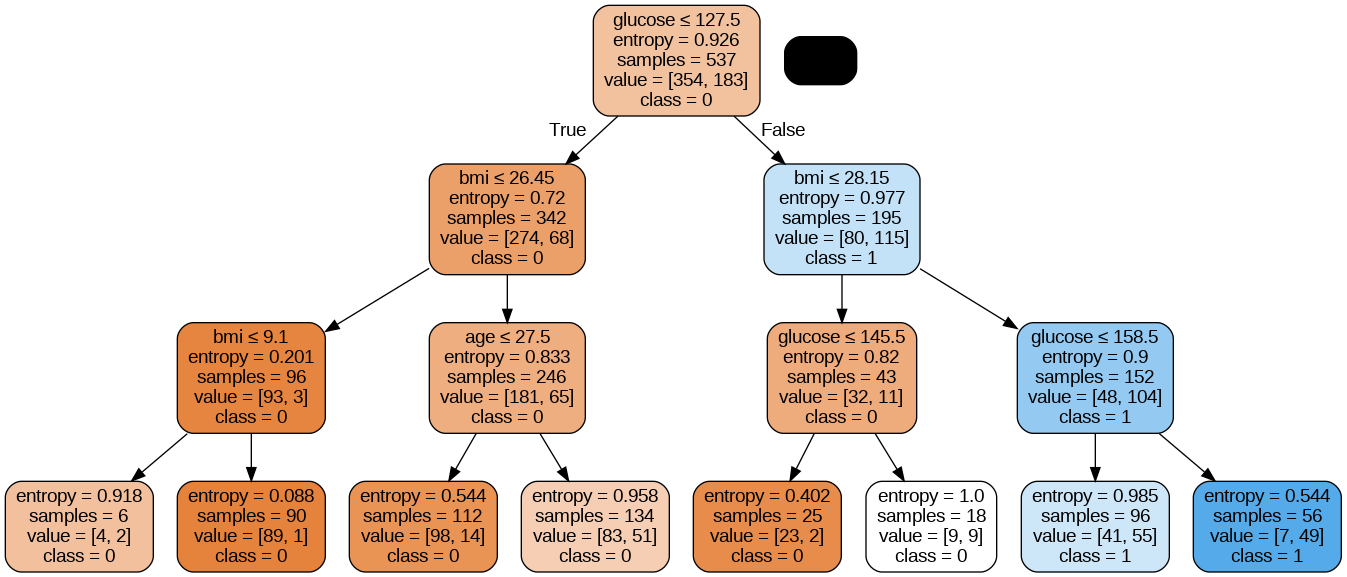

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True, feature_names = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'],
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
# performance tunning

